In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (e.g., resize, normalize)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the datasets with corrected paths
train_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', transform=transform)
val_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/val', transform=transform)
test_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/test', transform=transform)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Function to count images in each class
def count_classes(dataset):
    benign_count = 0
    malignant_count = 0
    
    for _, labels in DataLoader(dataset, batch_size=1):  # Load one image at a time
        for label in labels:
            if label == 0:  # Assuming 0 corresponds to 'benign'
                benign_count += 1
            elif label == 1:  # Assuming 1 corresponds to 'malignant'
                malignant_count += 1
                
    return benign_count, malignant_count

# Count classes in each dataset
train_benign, train_malignant = count_classes(train_dataset)
val_benign, val_malignant = count_classes(val_dataset)
test_benign, test_malignant = count_classes(test_dataset)

# Display counts
print(f'Train dataset: {train_benign} benign, {train_malignant} malignant')
print(f'Validation dataset: {val_benign} benign, {val_malignant} malignant')
print(f'Test dataset: {test_benign} benign, {test_malignant} malignant')


Train dataset: 5559 benign, 14875 malignant
Validation dataset: 408 benign, 1581 malignant
Test dataset: 1938 benign, 4913 malignant


Matplotlib is building the font cache; this may take a moment.


Train dataset: 5559 benign, 14875 malignant
Validation dataset: 408 benign, 1581 malignant
Test dataset: 1938 benign, 4913 malignant


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.92941177].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.77254903].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.78039217].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7882353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9764706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8039216].
Clipping input data to t

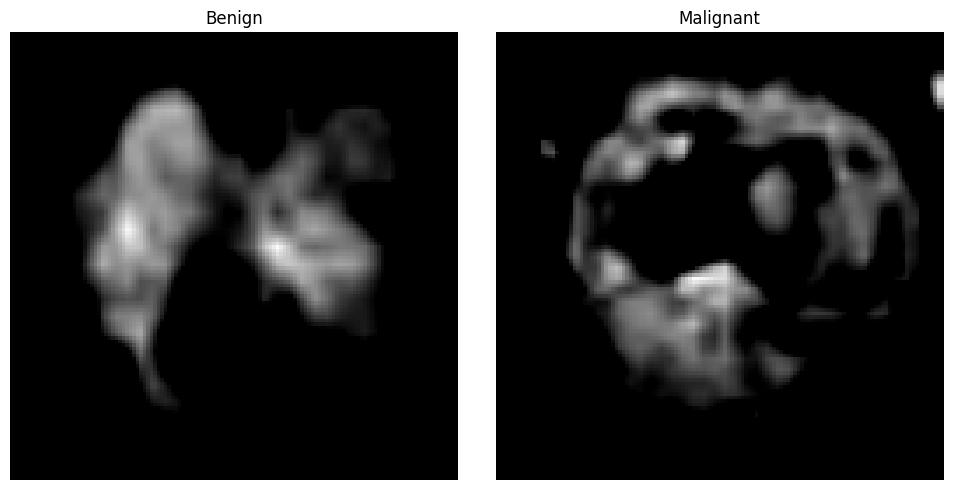

In [4]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations (e.g., resize, normalize)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the datasets with corrected paths
train_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', transform=transform)
val_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/val', transform=transform)
test_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/test', transform=transform)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Function to count images in each class
def count_classes(dataset):
    benign_count = 0
    malignant_count = 0
    
    for _, labels in DataLoader(dataset, batch_size=1):  # Load one image at a time
        for label in labels:
            if label == 0:  # Assuming 0 corresponds to 'benign'
                benign_count += 1
            elif label == 1:  # Assuming 1 corresponds to 'malignant'
                malignant_count += 1
                
    return benign_count, malignant_count

# Count classes in each dataset
train_benign, train_malignant = count_classes(train_dataset)
val_benign, val_malignant = count_classes(val_dataset)
test_benign, test_malignant = count_classes(test_dataset)

# Display counts
print(f'Train dataset: {train_benign} benign, {train_malignant} malignant')
print(f'Validation dataset: {val_benign} benign, {val_malignant} malignant')
print(f'Test dataset: {test_benign} benign, {test_malignant} malignant')

# Function to display images in classes
def show_images(dataset, num_images=5):
    # Create a figure with subplots
    plt.figure(figsize=(10, 5))
    
    # Get class names
    class_names = dataset.classes
    
    # Create a dictionary to store images for each class
    class_images = {name: [] for name in class_names}
    
    # Load images until we fill class_images
    for img, label in DataLoader(dataset, batch_size=1):
        class_name = class_names[label.item()]
        class_images[class_name].append(img[0])  # Add image tensor to the corresponding class
        
        # Break if we have enough images for each class
        if all(len(class_images[name]) >= num_images for name in class_names):
            break
    
    # Display images for each class
    for class_name, images in class_images.items():
        plt.subplot(1, len(class_names), list(class_images.keys()).index(class_name) + 1)
        plt.title(class_name)
        for i in range(num_images):
            plt.imshow(images[i].permute(1, 2, 0).numpy())  # Change tensor to numpy array
            plt.axis('off')
        plt.tight_layout()
    
    plt.show()

# Show images from the training dataset
show_images(train_dataset, num_images=5)  # Display 5 images from each class


Train dataset: 5559 benign, 14875 malignant
Validation dataset: 408 benign, 1581 malignant
Test dataset: 1938 benign, 4913 malignant


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.92941177].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.78039217].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.77254903].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.78039217].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9764706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.79607844].
Clipping input data t

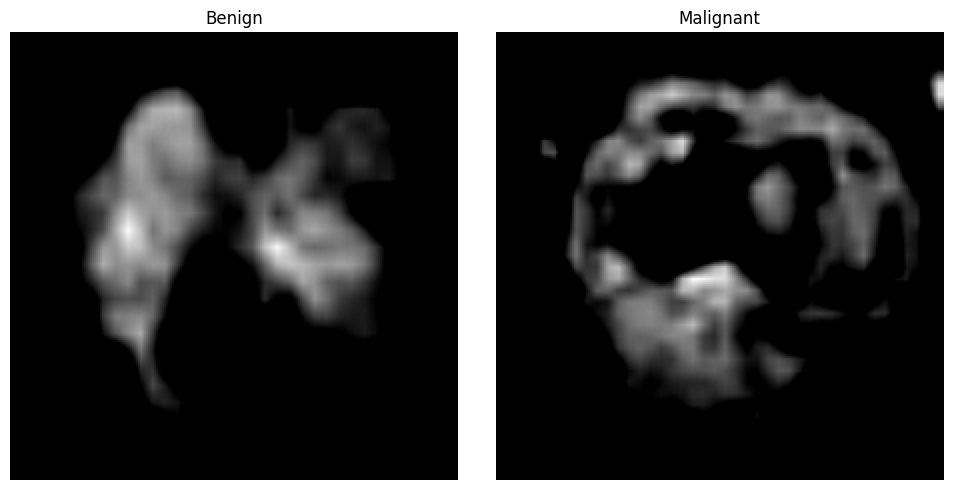

In [5]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations (e.g., resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the datasets with corrected paths
train_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', transform=transform)
val_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/val', transform=transform)
test_dataset = datasets.ImageFolder(root='/Users/shalem/Documents/tumourtrace/clasification-roi/test', transform=transform)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Function to count images in each class
def count_classes(dataset):
    benign_count = 0
    malignant_count = 0
    
    for _, labels in DataLoader(dataset, batch_size=1):  # Load one image at a time
        for label in labels:
            if label == 0:  # Assuming 0 corresponds to 'benign'
                benign_count += 1
            elif label == 1:  # Assuming 1 corresponds to 'malignant'
                malignant_count += 1
                
    return benign_count, malignant_count

# Count classes in each dataset
train_benign, train_malignant = count_classes(train_dataset)
val_benign, val_malignant = count_classes(val_dataset)
test_benign, test_malignant = count_classes(test_dataset)

# Display counts
print(f'Train dataset: {train_benign} benign, {train_malignant} malignant')
print(f'Validation dataset: {val_benign} benign, {val_malignant} malignant')
print(f'Test dataset: {test_benign} benign, {test_malignant} malignant')

# Function to display images in classes
def show_images(dataset, num_images=5):
    # Create a figure with subplots
    plt.figure(figsize=(10, 5))
    
    # Get class names
    class_names = dataset.classes
    
    # Create a dictionary to store images for each class
    class_images = {name: [] for name in class_names}
    
    # Load images until we fill class_images
    for img, label in DataLoader(dataset, batch_size=1):
        class_name = class_names[label.item()]
        class_images[class_name].append(img[0])  # Add image tensor to the corresponding class
        
        # Break if we have enough images for each class
        if all(len(class_images[name]) >= num_images for name in class_names):
            break
    
    # Display images for each class
    for class_name, images in class_images.items():
        plt.subplot(1, len(class_names), list(class_images.keys()).index(class_name) + 1)
        plt.title(class_name)
        for i in range(num_images):
            plt.imshow(images[i].permute(1, 2, 0).numpy())  # Change tensor to numpy array
            plt.axis('off')
        plt.tight_layout()
    
    plt.show()

# Show images from the training dataset
show_images(train_dataset, num_images=5)  # Display 5 images from each class


Train dataset: 5559 benign, 14875 malignant
Validation dataset: 408 benign, 1581 malignant
Test dataset: 1938 benign, 4913 malignant


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7882353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.56078434].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..0.30196083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9372549..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.94509804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9137255].
Clipping input data to 

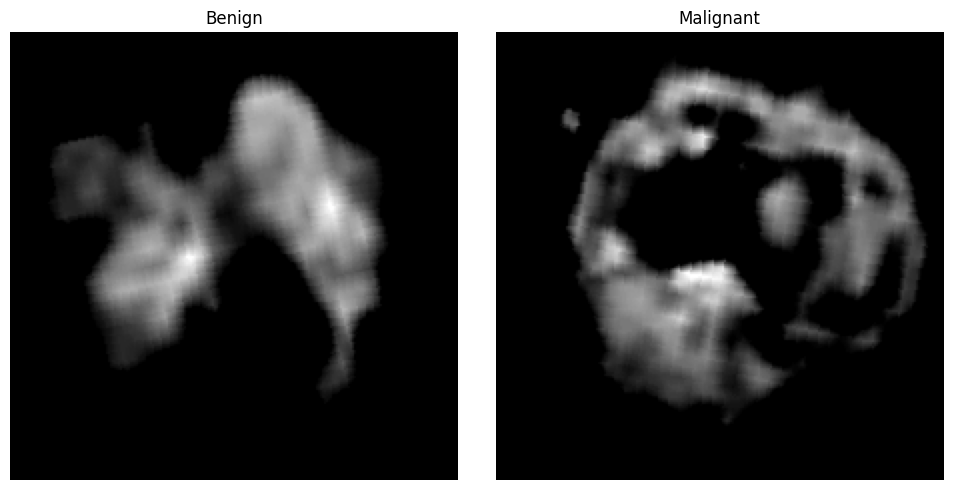

In [1]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data Augmentation for Training Dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to 224x224 pixels
    transforms.RandomHorizontalFlip(p=0.5),       # Randomly flip images horizontally with 50% probability
    transforms.RandomRotation(degrees=15),        # Randomly rotate images within a range of ±15 degrees
    transforms.ColorJitter(brightness=0.2,        # Randomly change brightness, contrast, saturation, and hue
                           contrast=0.2, 
                           saturation=0.2, 
                           hue=0.1),
    transforms.ToTensor(),                        # Convert image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

# No Data Augmentation for Validation and Test Datasets
test_val_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize images to 224x224 pixels
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

# Load the datasets with appropriate transforms
train_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', 
    transform=train_transform
)
val_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/val', 
    transform=test_val_transform
)
test_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/test', 
    transform=test_val_transform
)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Function to count images in each class
def count_classes(dataset):
    benign_count = 0
    malignant_count = 0
    
    for _, labels in DataLoader(dataset, batch_size=1):  # Load one image at a time
        for label in labels:
            if label == 0:  # Assuming 0 corresponds to 'benign'
                benign_count += 1
            elif label == 1:  # Assuming 1 corresponds to 'malignant'
                malignant_count += 1
                
    return benign_count, malignant_count

# Count classes in each dataset
train_benign, train_malignant = count_classes(train_dataset)
val_benign, val_malignant = count_classes(val_dataset)
test_benign, test_malignant = count_classes(test_dataset)

# Display counts
print(f'Train dataset: {train_benign} benign, {train_malignant} malignant')
print(f'Validation dataset: {val_benign} benign, {val_malignant} malignant')
print(f'Test dataset: {test_benign} benign, {test_malignant} malignant')

# Function to display images from each class
def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 5))  # Create a figure
    
    class_names = dataset.classes  # Get class names
    class_images = {name: [] for name in class_names}  # Store images by class
    
    for img, label in DataLoader(dataset, batch_size=1):  # Load one image at a time
        class_name = class_names[label.item()]
        class_images[class_name].append(img[0])  # Add the image to the corresponding class
        
        # Stop if we have enough images for each class
        if all(len(class_images[name]) >= num_images for name in class_names):
            break
    
    # Display the images
    for class_name, images in class_images.items():
        plt.subplot(1, len(class_names), list(class_images.keys()).index(class_name) + 1)
        plt.title(class_name)  # Set the title as the class name
        
        for i in range(num_images):
            plt.imshow(images[i].permute(1, 2, 0).numpy())  # Convert tensor to numpy
            plt.axis('off')  # Hide axis
            
        plt.tight_layout()  # Adjust layout to prevent overlap
    
    plt.show()  # Display the plot

# Show images from the training dataset
show_images(train_dataset, num_images=5)


In [2]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data Augmentation for Training Dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to 224x224 pixels
    transforms.RandomHorizontalFlip(p=0.5),       # Randomly flip images horizontally
    transforms.RandomRotation(degrees=15),        # Randomly rotate images within a range of ±15 degrees
    transforms.ColorJitter(brightness=0.2,        # Randomly change brightness, contrast, saturation, and hue
                           contrast=0.2, 
                           saturation=0.2, 
                           hue=0.1),
    transforms.ToTensor(),                        # Convert image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

# Load the training dataset with the augmented transform
train_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', 
    transform=train_transform
)

# Function to display augmented images
def show_augmented_images(dataset, class_name, num_images=5):
    plt.figure(figsize=(15, 5))  # Create a figure with a fixed size
    
    # Find the class index for the requested class name
    class_idx = dataset.class_to_idx[class_name]
    
    # Load a sample image of the requested class
    for img, label in DataLoader(dataset, batch_size=1):
        if label.item() == class_idx:  # Check if the image belongs to the desired class
            sample_img = img[0]  # Extract the image tensor
            break  # Stop after finding the first matching image
    
    # Display multiple augmented versions of the same image
    for i in range(num_images):
        augmented_img = train_transform(sample_img)  # Apply random transformations again
        
        plt.subplot(1, num_images, i + 1)  # Create a subplot for each image
        plt.imshow(augmented_img.permute(1, 2, 0).numpy())  # Convert tensor to numpy
        plt.axis('off')  # Hide axis

    plt.suptitle(f'Augmented versions of class: {class_name}', fontsize=16)
    plt.tight_layout()
    plt.show()  # Display the plot

# Display 5 augmented versions of a sample benign image
show_augmented_images(train_dataset, class_name='benign', num_images=5)

# Display 5 augmented versions of a sample malignant image
show_augmented_images(train_dataset, class_name='malignant', num_images=5)



KeyError: 'benign'

<Figure size 1500x500 with 0 Axes>

In [3]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data Augmentation for Training Dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to 224x224 pixels
    transforms.RandomHorizontalFlip(p=0.5),       # Randomly flip images horizontally
    transforms.RandomRotation(degrees=15),        # Randomly rotate images within ±15 degrees
    transforms.ColorJitter(brightness=0.2,        # Random brightness, contrast, saturation, and hue
                           contrast=0.2, 
                           saturation=0.2, 
                           hue=0.1),
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# No Data Augmentation for Validation and Test Datasets
test_val_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize images to 224x224 pixels
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

# Load the datasets with appropriate transforms
train_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', 
    transform=train_transform
)
val_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/val', 
    transform=test_val_transform
)
test_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/test', 
    transform=test_val_transform
)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Display available class names
print(f"Available class names: {train_dataset.classes}")

# Function to display augmented images
def show_augmented_images(dataset, class_name, num_images=5):
    """Display multiple augmented versions of a sample image from a given class."""
    if class_name not in dataset.classes:
        raise ValueError(f"Class '{class_name}' not found. Available classes: {dataset.classes}")
    
    plt.figure(figsize=(15, 5))  # Create a figure with a fixed size
    
    # Find the class index for the requested class name
    class_idx = dataset.class_to_idx[class_name]
    
    # Load a sample image of the requested class
    for img, label in DataLoader(dataset, batch_size=1, shuffle=True):
        if label.item() == class_idx:  # Check if the image belongs to the desired class
            sample_img = img[0]  # Extract the image tensor
            break  # Stop after finding the first matching image
    
    # Display multiple augmented versions of the same image
    for i in range(num_images):
        augmented_img = train_transform(sample_img)  # Apply random transformations again
        
        plt.subplot(1, num_images, i + 1)  # Create a subplot for each image
        plt.imshow(augmented_img.permute(1, 2, 0).numpy())  # Convert tensor to numpy
        plt.axis('off')  # Hide axis

    plt.suptitle(f'Augmented versions of class: {class_name}', fontsize=16)
    plt.tight_layout()
    plt.show()  # Display the plot

# Display 5 augmented versions of the first class (e.g., 'benign')
show_augmented_images(train_dataset, class_name=train_dataset.classes[0], num_images=5)

# If there is more than one class, display augmented versions of the second class (e.g., 'malignant')
if len(train_dataset.classes) > 1:
    show_augmented_images(train_dataset, class_name=train_dataset.classes[1], num_images=5)

# Function to count images in each class
def count_classes(dataset):
    benign_count = 0
    malignant_count = 0
    
    for _, labels in DataLoader(dataset, batch_size=1):
        for label in labels:
            if label == 0:  # Assuming 0 corresponds to 'benign'
                benign_count += 1
            elif label == 1:  # Assuming 1 corresponds to 'malignant'
                malignant_count += 1
                
    return benign_count, malignant_count

# Count classes in each dataset
train_benign, train_malignant = count_classes(train_dataset)
val_benign, val_malignant = count_classes(val_dataset)
test_benign, test_malignant = count_classes(test_dataset)

# Display counts
print(f'Train dataset: {train_benign} benign, {train_malignant} malignant')
print(f'Validation dataset: {val_benign} benign, {val_malignant} malignant')
print(f'Test dataset: {test_benign} benign, {test_malignant} malignant')


Available class names: ['Benign', 'Malignant']


TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

<Figure size 1500x500 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..0.36470592].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843..0.12156868].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8509804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.78039217].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6627451].


Available class names: ['Benign', 'Malignant']


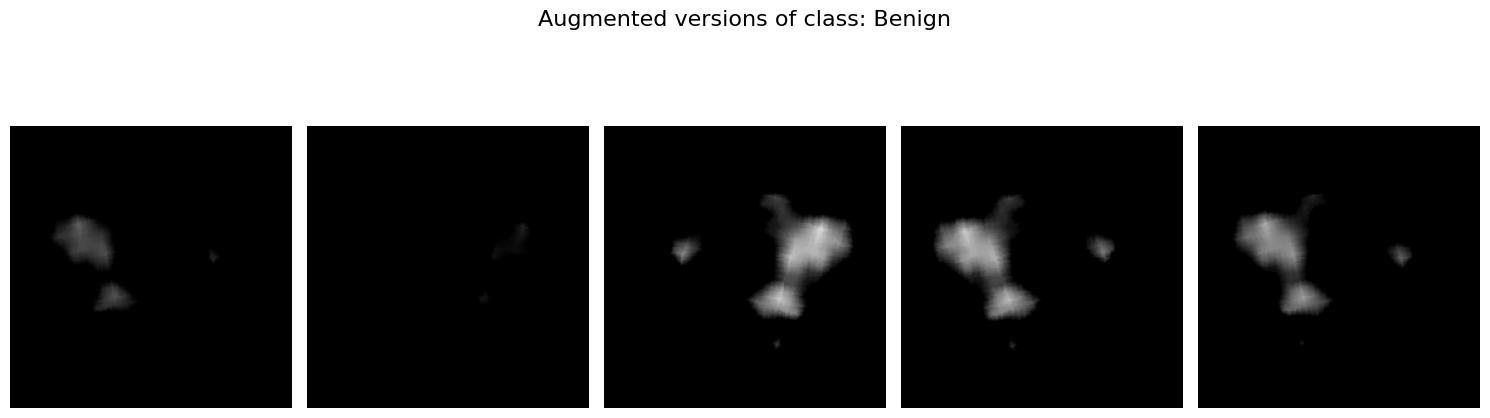

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8901961..0.84313726].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8039216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8039216..0.7019608].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8980392].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.90588236].


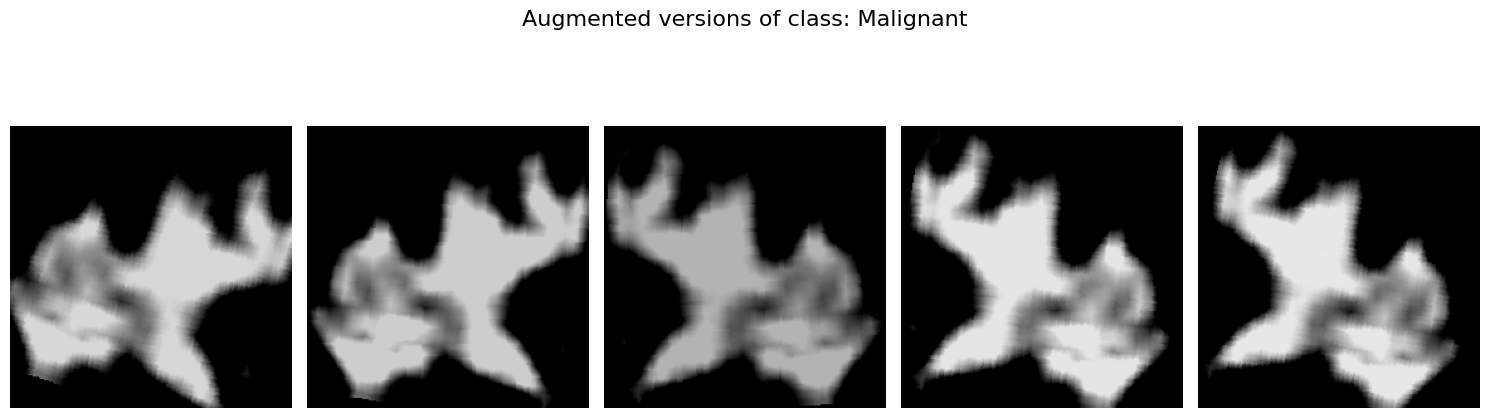

Train dataset: 5559 benign, 14875 malignant
Validation dataset: 408 benign, 1581 malignant
Test dataset: 1938 benign, 4913 malignant


In [4]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image  # Import PIL for converting tensors back to images

# Data Augmentation for Training Dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to 224x224 pixels
    transforms.RandomHorizontalFlip(p=0.5),       # Randomly flip images horizontally
    transforms.RandomRotation(degrees=15),        # Randomly rotate images within ±15 degrees
    transforms.ColorJitter(brightness=0.2,        # Random brightness, contrast, saturation, and hue
                           contrast=0.2, 
                           saturation=0.2, 
                           hue=0.1),
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# No Data Augmentation for Validation and Test Datasets
test_val_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize images to 224x224 pixels
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

# Load the datasets with appropriate transforms
train_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', 
    transform=train_transform
)
val_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/val', 
    transform=test_val_transform
)
test_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/test', 
    transform=test_val_transform
)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Display available class names
print(f"Available class names: {train_dataset.classes}")

# Function to convert tensor to PIL image
def tensor_to_pil(tensor):
    """Convert a tensor to a PIL image."""
    unnormalize = transforms.Normalize(
        mean=[-0.5 / 0.5, -0.5 / 0.5, -0.5 / 0.5], 
        std=[1 / 0.5, 1 / 0.5, 1 / 0.5]
    )
    tensor = unnormalize(tensor)  # Undo normalization
    tensor = tensor.clamp(0, 1)  # Clamp values between 0 and 1
    return transforms.ToPILImage()(tensor)  # Convert to PIL image

# Function to display augmented images
def show_augmented_images(dataset, class_name, num_images=5):
    """Display multiple augmented versions of a sample image from a given class."""
    if class_name not in dataset.classes:
        raise ValueError(f"Class '{class_name}' not found. Available classes: {dataset.classes}")
    
    plt.figure(figsize=(15, 5))  # Create a figure with a fixed size
    
    # Find the class index for the requested class name
    class_idx = dataset.class_to_idx[class_name]
    
    # Load a sample image of the requested class
    for img, label in DataLoader(dataset, batch_size=1, shuffle=True):
        if label.item() == class_idx:  # Check if the image belongs to the desired class
            sample_img = img[0]  # Extract the image tensor
            pil_img = tensor_to_pil(sample_img)  # Convert tensor to PIL image
            break  # Stop after finding the first matching image
    
    # Display multiple augmented versions of the same image
    for i in range(num_images):
        augmented_img = train_transform(pil_img)  # Apply transformations on the PIL image
        
        plt.subplot(1, num_images, i + 1)  # Create a subplot for each image
        plt.imshow(augmented_img.permute(1, 2, 0).numpy())  # Convert tensor to numpy
        plt.axis('off')  # Hide axis

    plt.suptitle(f'Augmented versions of class: {class_name}', fontsize=16)
    plt.tight_layout()
    plt.show()  # Display the plot

# Display 5 augmented versions of the first class (e.g., 'benign')
show_augmented_images(train_dataset, class_name=train_dataset.classes[0], num_images=5)

# If there is more than one class, display augmented versions of the second class (e.g., 'malignant')
if len(train_dataset.classes) > 1:
    show_augmented_images(train_dataset, class_name=train_dataset.classes[1], num_images=5)

# Function to count images in each class
def count_classes(dataset):
    benign_count = 0
    malignant_count = 0
    
    for _, labels in DataLoader(dataset, batch_size=1):
        for label in labels:
            if label == 0:  # Assuming 0 corresponds to 'benign'
                benign_count += 1
            elif label == 1:  # Assuming 1 corresponds to 'malignant'
                malignant_count += 1
                
    return benign_count, malignant_count

# Count classes in each dataset
train_benign, train_malignant = count_classes(train_dataset)
val_benign, val_malignant = count_classes(val_dataset)
test_benign, test_malignant = count_classes(test_dataset)

# Display counts
print(f'Train dataset: {train_benign} benign, {train_malignant} malignant')
print(f'Validation dataset: {val_benign} benign, {val_malignant} malignant')
print(f'Test dataset: {test_benign} benign, {test_malignant} malignant')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.78039217].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.8509804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.69411767].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6627451].


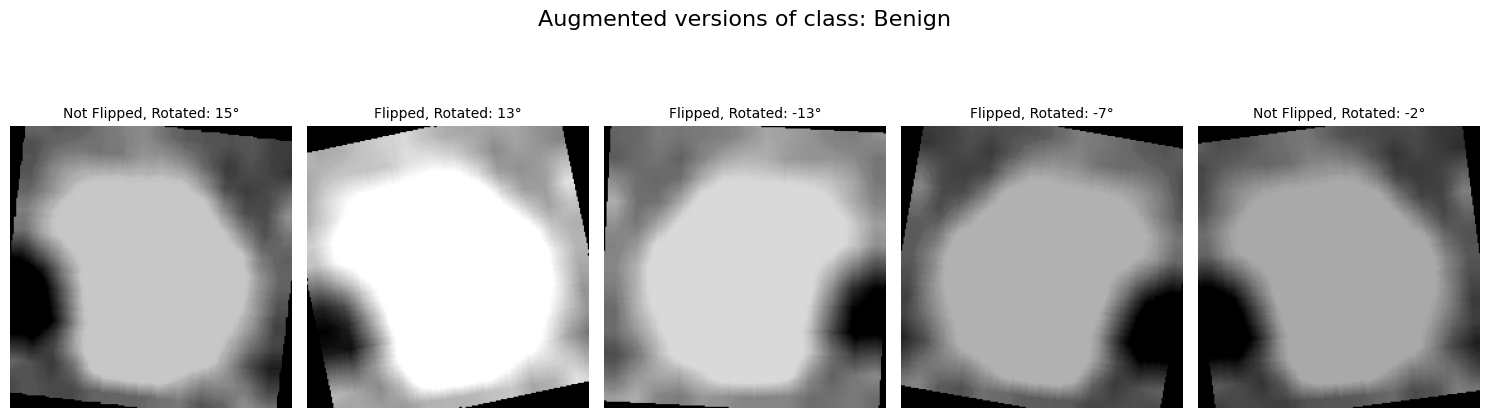

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.60784316].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8666667].


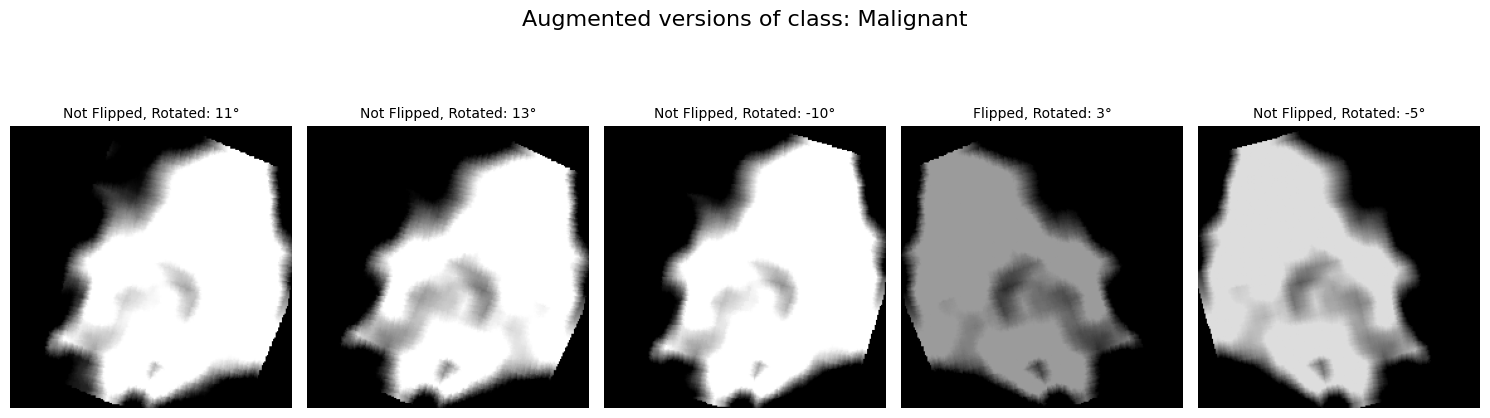

Train dataset counts: {'Benign': 5559, 'Malignant': 14875}
Validation dataset counts: {'Benign': 408, 'Malignant': 1581}
Test dataset counts: {'Benign': 1938, 'Malignant': 4913}


In [5]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image  # Import PIL for converting tensors back to images
import random

# Data Augmentation for Training Dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to 224x224 pixels
    transforms.RandomHorizontalFlip(p=0.5),       # Randomly flip images horizontally
    transforms.RandomRotation(degrees=15),        # Randomly rotate images within ±15 degrees
    transforms.ColorJitter(brightness=0.2,        # Random brightness, contrast, saturation, and hue
                           contrast=0.2, 
                           saturation=0.2, 
                           hue=0.1),
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# No Data Augmentation for Validation and Test Datasets
test_val_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize images to 224x224 pixels
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

# Load the datasets with appropriate transforms
train_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', 
    transform=train_transform
)
val_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/val', 
    transform=test_val_transform
)
test_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/test', 
    transform=test_val_transform
)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Function to convert tensor to PIL image
def tensor_to_pil(tensor):
    """Convert a tensor to a PIL image."""
    unnormalize = transforms.Normalize(
        mean=[-0.5 / 0.5, -0.5 / 0.5, -0.5 / 0.5], 
        std=[1 / 0.5, 1 / 0.5, 1 / 0.5]
    )
    tensor = unnormalize(tensor)  # Undo normalization
    tensor = tensor.clamp(0, 1)  # Clamp values between 0 and 1
    return transforms.ToPILImage()(tensor)  # Convert to PIL image

# Function to display augmented images with titles
def show_augmented_images(dataset, class_name, num_images=5):
    """Display multiple augmented versions of a sample image from a given class."""
    if class_name not in dataset.classes:
        raise ValueError(f"Class '{class_name}' not found. Available classes: {dataset.classes}")
    
    plt.figure(figsize=(15, 5))  # Create a figure with a fixed size
    
    # Find the class index for the requested class name
    class_idx = dataset.class_to_idx[class_name]
    
    # Load a sample image of the requested class
    for img, label in DataLoader(dataset, batch_size=1, shuffle=True):
        if label.item() == class_idx:  # Check if the image belongs to the desired class
            sample_img = img[0]  # Extract the image tensor
            pil_img = tensor_to_pil(sample_img)  # Convert tensor to PIL image
            break  # Stop after finding the first matching image
    
    # Display multiple augmented versions of the same image with titles
    for i in range(num_images):
        augmented_img = train_transform(pil_img)  # Apply transformations on the PIL image
        
        # Generate a random title for the augmentation
        flip_status = "Flipped" if random.random() < 0.5 else "Not Flipped"
        rotation_degree = random.randint(-15, 15)
        title = f"{flip_status}, Rotated: {rotation_degree}°"
        
        plt.subplot(1, num_images, i + 1)  # Create a subplot for each image
        plt.imshow(augmented_img.permute(1, 2, 0).numpy())  # Convert tensor to numpy
        plt.axis('off')  # Hide axis
        plt.title(title, fontsize=10)  # Set the title

    plt.suptitle(f'Augmented versions of class: {class_name}', fontsize=16)
    plt.tight_layout()
    plt.show()  # Display the plot

# Display 5 augmented versions of the first class (e.g., 'benign')
show_augmented_images(train_dataset, class_name=train_dataset.classes[0], num_images=5)

# If there is more than one class, display augmented versions of the second class (e.g., 'malignant')
if len(train_dataset.classes) > 1:
    show_augmented_images(train_dataset, class_name=train_dataset.classes[1], num_images=5)

# Function to count images in each class
def count_classes(dataset):
    """Count the number of images in each class."""
    class_counts = {class_name: 0 for class_name in dataset.classes}

    for _, labels in DataLoader(dataset, batch_size=1):
        for label in labels:
            class_name = dataset.classes[label.item()]
            class_counts[class_name] += 1

    return class_counts

# Count and display the number of images in each class for all datasets
train_counts = count_classes(train_dataset)
val_counts = count_classes(val_dataset)
test_counts = count_classes(test_dataset)

print(f'Train dataset counts: {train_counts}')
print(f'Validation dataset counts: {val_counts}')
print(f'Test dataset counts: {test_counts}')


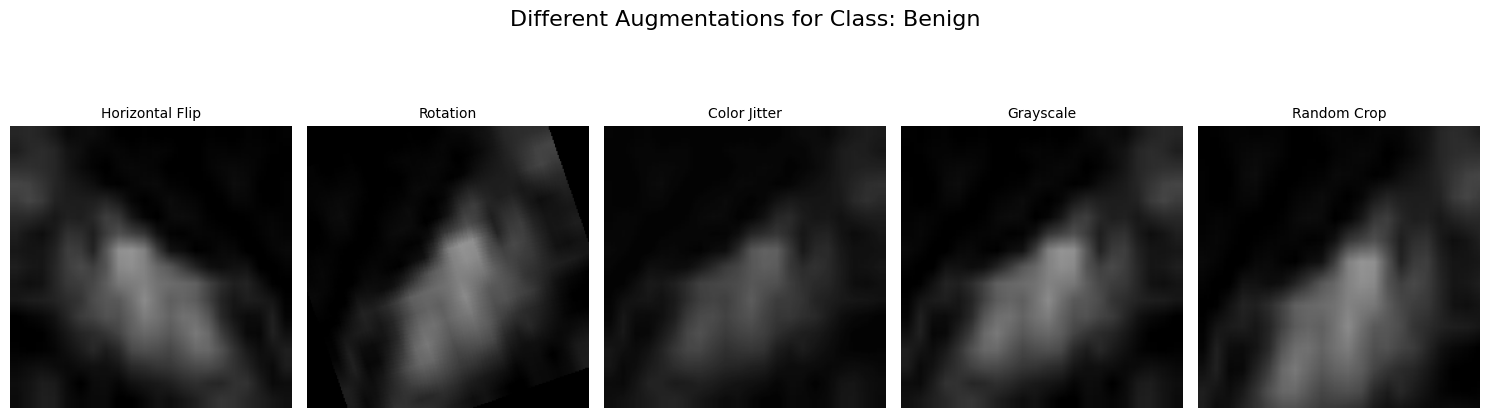

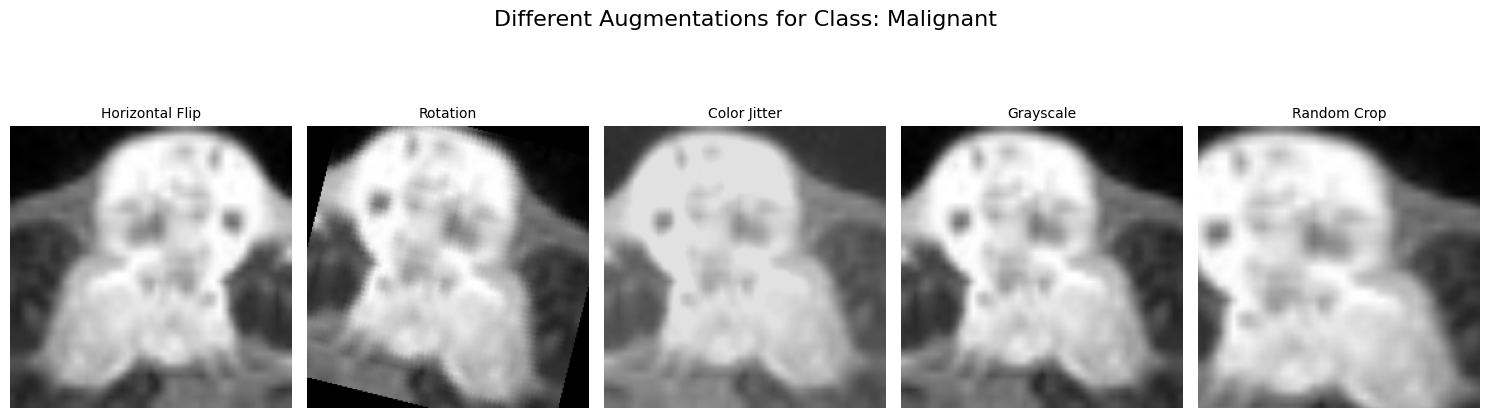

Train dataset counts: {'Benign': 5559, 'Malignant': 14875}
Validation dataset counts: {'Benign': 408, 'Malignant': 1581}
Test dataset counts: {'Benign': 1938, 'Malignant': 4913}


In [9]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image  # Import PIL for converting tensors back to images

# Data Augmentation for Training Dataset
# Define individual transformation functions
def random_horizontal_flip(img):
    transform = transforms.RandomHorizontalFlip(p=1.0)  # Always flip horizontally
    return transform(img), "Horizontal Flip"

def random_rotation(img):
    transform = transforms.RandomRotation(degrees=(-30, 30))  # Rotate within [-30°, 30°]
    return transform(img), "Rotation"

def random_color_jitter(img):
    transform = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1)
    return transform(img), "Color Jitter"

def random_grayscale(img):
    transform = transforms.RandomGrayscale(p=1.0)  # Convert to grayscale
    return transform(img), "Grayscale"

def random_crop(img):
    transform = transforms.RandomResizedCrop(size=(224, 224), scale=(0.5, 1.0))  # Random crop
    return transform(img), "Random Crop"

# List of transformation functions for easy iteration
transformations = [
    random_horizontal_flip,
    random_rotation,
    random_color_jitter,
    random_grayscale,
    random_crop
]

# Data augmentation for training dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize images to 224x224 pixels
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

# No Data Augmentation for Validation and Test Datasets
test_val_transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize images to 224x224 pixels
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

# Load the datasets with appropriate transforms
train_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/train', 
    transform=train_transform
)
val_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/val', 
    transform=test_val_transform
)
test_dataset = datasets.ImageFolder(
    root='/Users/shalem/Documents/tumourtrace/clasification-roi/test', 
    transform=test_val_transform
)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Function to convert tensor to PIL image
def tensor_to_pil(tensor):
    """Convert a tensor to a PIL image."""
    unnormalize = transforms.Normalize(
        mean=[-0.5 / 0.5, -0.5 / 0.5, -0.5 / 0.5], 
        std=[1 / 0.5, 1 / 0.5, 1 / 0.5]
    )
    tensor = unnormalize(tensor)  # Undo normalization
    tensor = tensor.clamp(0, 1)  # Clamp values between 0 and 1
    return transforms.ToPILImage()(tensor)  # Convert to PIL image

# Function to display different augmented versions of a sample image
def show_augmented_images(dataset, class_name):
    """Display different types of augmentations for a sample image."""
    if class_name not in dataset.classes:
        raise ValueError(f"Class '{class_name}' not found. Available classes: {dataset.classes}")
    
    plt.figure(figsize=(15, 5))  # Create a figure with a fixed size
    
    # Find the class index for the requested class name
    class_idx = dataset.class_to_idx[class_name]
    
    # Load a sample image of the requested class
    for img, label in DataLoader(dataset, batch_size=1, shuffle=True):
        if label.item() == class_idx:  # Check if the image belongs to the desired class
            sample_img = img[0]  # Extract the image tensor
            pil_img = tensor_to_pil(sample_img)  # Convert tensor to PIL image
            break  # Stop after finding the first matching image
    
    # Apply and display different transformations
    for i, transform_fn in enumerate(transformations):
        augmented_img, title = transform_fn(pil_img)  # Apply transformation
        
        plt.subplot(1, len(transformations), i + 1)  # Create a subplot for each transformation
        plt.imshow(augmented_img)  # Display the augmented image
        plt.axis('off')  # Hide axis
        plt.title(title, fontsize=10)  # Set the title

    plt.suptitle(f'Different Augmentations for Class: {class_name}', fontsize=16)
    plt.tight_layout()
    plt.show()  # Display the plot

# Display augmented images for the first class (e.g., 'benign')
show_augmented_images(train_dataset, class_name=train_dataset.classes[0])

# If there is more than one class, display augmented images for the second class (e.g., 'malignant')
if len(train_dataset.classes) > 1:
    show_augmented_images(train_dataset, class_name=train_dataset.classes[1])

# Function to count images in each class
def count_classes(dataset):
    """Count the number of images in each class."""
    class_counts = {class_name: 0 for class_name in dataset.classes}

    for _, labels in DataLoader(dataset, batch_size=1):
        for label in labels:
            class_name = dataset.classes[label.item()]
            class_counts[class_name] += 1

    return class_counts

# Count and display the number of images in each class for all datasets
train_counts = count_classes(train_dataset)
val_counts = count_classes(val_dataset)
test_counts = count_classes(test_dataset)

print(f'Train dataset counts: {train_counts}')
print(f'Validation dataset counts: {val_counts}')
print(f'Test dataset counts: {test_counts}')
